In [22]:
import pandas as pd
import numpy as np
from pyteomics import fasta
import sys
import os
from collections import Counter
import matplotlib.pyplot as plt

<h1> NetworKin KSA analysis --> Table prep

In [23]:
##############################################
#####       NetworKin KSA analysis       #####
#####            Table prep              #####
##############################################

## load NetworKin KSA predictions and filter/format table
path_read = os.path.abspath('')+'\\Prepared_tables'
df_pred = pd.read_csv((path_read+ '\\networkin_predictions_new.tsv'),sep = '\t', low_memory= False)
df_pred['position'] = df_pred['position'].astype(str)
df_pred['site_id'] = df_pred[['#substrate', 'position']].agg('_'.join, axis=1)
df_pred = df_pred[df_pred['tree']=='KIN'].reset_index(drop=True)

## Kinase mapping dataframe. This table uses Kinase groups of the NetworKin KSA and mappes them to Kinase "Superfamily" and "Group" annotations as used by the kinase.com website. This will allow comparisons to the DeepKinZero approach.
pd_kinase_group_mapping = pd.DataFrame()
pd_kinase_group_mapping['NetworKin'] = ['ACTR2_ACTR2B_TGFbR2_group','AMPK_group','ATM_ATR_group','AuroraA','CDK2_CDK3_CDK1_CDK5_group','CK1_group','CK2_group','CLK_group','CaMKII_group','CaMKIV','DAPK_group','DMPK_group','DNAPK','GRK_group','GSK3_group','HIPK1_HIPK2_group','IKKalpha_IKKbeta_group','InsR_group','JAK2','JNK_group','MAP2K_group','MAPK3_MAPK1_MAPK7_NLK_group','MST_group','Met_group','NEK1_NEK5_NEK3_NEK4_NEK11_NEK2_group','PAK_group','PDHK_group','PKA_group','PKB_group','PKC_group','PKD_group','PKGcGK_group','Pim3_Pim1_group','RCK_group','ROCK_group','RSK_group','Src_group','TLK_group','TTK','p38_group']
pd_kinase_group_mapping['Superfamily'] = ['TKL','CAMK','Atypical','Other','CMGC','CK1','Other','CMGC','CAMK','CAMK','CAMK','AGC','Atypical','AGC','CMGC','CMGC','Other','TK','TK','CMGC','STE','CMGC','STE','TK','Other','STE','Atypical','AGC','AGC','AGC','CAMK','AGC','CAMK','CMGC','AGC','AGC','TK','Other','Other','CMGC']
pd_kinase_group_mapping['Group'] = ['STKR','CAMKL','PIKK','AUR','CDK','CK1','CK2','CLK','CAMK2','CAMK1','DAPK','DMPK','PIKK','GRK','GSK','DYRK','IKK','InsR','JakA','MAPK','STE7','MAPK','STE20','Met','NEK','STE20','PDHK','PKA','AKT','PKC','PKD','PKA','PIM','RCK','DMPK','RSK','Src','TLK','TTK','MAPK']

## The NetworKin prediction tool reports multiple Kinases for a given substrate. These KSA differ by the 'Networkin_score', wof which we only want to keep the highest.
sites = list(set(df_pred['site_id']))

df_top_hits = pd.DataFrame(columns=df_pred.columns )
for s in sites: 
    df_temp = df_pred[df_pred['site_id'] == s].reset_index(drop = True)
    top_score = df_temp['networkin_score'].max()
    df_top_hits = df_top_hits.append(df_temp[df_temp['networkin_score'] == top_score]).reset_index(drop= True)
    
## Use the kinase mapping dataframe to add kinase 'Superfamily' and 'Group' information to the table.
df_top_hits['Superfamily'] = [list(pd_kinase_group_mapping[pd_kinase_group_mapping['NetworKin'] == df_top_hits['netphorest_group'][i]]['Superfamily'])[0] for i in range(len(df_top_hits))]
df_top_hits['Group'] = [list(pd_kinase_group_mapping[pd_kinase_group_mapping['NetworKin'] == df_top_hits['netphorest_group'][i]]['Group'])[0] for i in range(len(df_top_hits))]

C:\Users\fhansen\AppData\Local\Temp\ipykernel_21832\1665647794.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_hits = df_top_hits.append(df_temp[df_temp['networkin_score'] == top_score]).reset_index(drop= True)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_21832\1665647794.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_hits = df_top_hits.append(df_temp[df_temp['networkin_score'] == top_score]).reset_index(drop= True)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_21832\1665647794.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_hits = df_top_hits.append(df_temp[df_temp['networkin_score'] == top_score]).reset_index(drop= True)
C:\Users\fhansen\AppData\Local\Temp\ipykernel_21832\1665647794.p

<h1> NetworKin KSA analysis
<h2> Plotting

In [24]:
##############################################
#####       NetworKin KSA analysis       #####
#####             Plotting               #####
##############################################


## Read
path_read = os.path.abspath('')+'\\Prepared_tables'
df = pd.read_csv((path_read+ '\\Prep_STYsites_mito.csv'), low_memory= False)


## Add new columns to 'Prep_STYsites' containing NetworKin and kinase.com kinase annotation information. 
Kinase_predict = []
networkin_score = []
netphorest_group = []
Group = []
Superfamily = []

for x in range(len(df)):
    Kinase_predict.append([df_top_hits['id'][i] for i in range(len(df_top_hits)) if ((df_top_hits['#substrate'][i]==df['Protein'][x]) & (int(df_top_hits['position'][i])==df['Position'][x]))] )
    networkin_score.append([df_top_hits['networkin_score'][i] for i in range(len(df_top_hits)) if ((df_top_hits['#substrate'][i]==df['Protein'][x]) & (int(df_top_hits['position'][i])==df['Position'][x]))])
    netphorest_group.append([df_top_hits['netphorest_group'][i] for i in range(len(df_top_hits)) if ((df_top_hits['#substrate'][i]==df['Protein'][x]) & (int(df_top_hits['position'][i])==df['Position'][x]))])
    Group.append([df_top_hits['Group'][i] for i in range(len(df_top_hits)) if ((df_top_hits['#substrate'][i]==df['Protein'][x]) & (int(df_top_hits['position'][i])==df['Position'][x]))])
    Superfamily.append([df_top_hits['Superfamily'][i] for i in range(len(df_top_hits)) if ((df_top_hits['#substrate'][i]==df['Protein'][x]) & (int(df_top_hits['position'][i])==df['Position'][x]))])
networkin_score = [-1 if networkin_score[i]==[]else networkin_score[i][0] for i in range(len(networkin_score))]

df['Kinase_predict'] = Kinase_predict
df['networkin_score'] = networkin_score
df['netphorest_group'] = netphorest_group
df['Group'] = Group
df['Superfamily'] = Superfamily

cols = ['Proteins','Positions within proteins','Gene names','PTM_Identifier','ESNG','Entrez_GeneID','SubMitoLocalization','IMPI_new','Localization prob','Kinase_predict','networkin_score','netphorest_group','Group','Superfamily']
df_top_hits = df[cols]

path_save = os.path.abspath('')+'\\raw_figures\\Figure_6\\'
df_top_hits.to_csv((path_save+ 'NetworKin_prediction_tophits.csv'), index= False)

In [31]:
##############################################
#####       NetworKin KSA analysis       #####
#####             Plottin                #####
#####         all tissues in one         #####
##############################################

#path_save = os.path.abspath('')+'\\raw_figures\\Figure_6\\'

## Chose plotting level 'Group' 'Superfamily'
Plot_level = 'Group'

## networKin score cutoff
cutoff = 1

## percente cutoff for display
cutoff_display = 0

tissues = ['B','BAT','H','SKM','S','K','L']

## filter for mitochondrial localizations
Matrix = df[df['SubMitoLocalization'] == "['Matrix']"].reset_index(drop=True)
MOM = df[df['SubMitoLocalization'] == "['MOM']"].reset_index(drop=True)
MIM = df[df['SubMitoLocalization'] == "['MIM']"].reset_index(drop=True)

## get groups (see Plot_level) for fifferent tissues
Matrix_groups = [Matrix[Plot_level][i][0] for i in range(len(Matrix)) if Matrix['networkin_score'][i]>=cutoff]
MOM_groups = [MOM[Plot_level][i][0] for i in range(len(MOM)) if MOM['networkin_score'][i]>=cutoff]
MIM_groups = [MIM[Plot_level][i][0] for i in range(len(MIM)) if MIM['networkin_score'][i]>=cutoff]

## calculate percentage values for each group instance for each mitochondrial localization
total_Matrix = sum(list(Counter(Matrix_groups).values()))
Matrix_counter = Counter(Matrix_groups).items()
Matrix_counter_percentages = {x: int(float(y) / total_Matrix * 100) for x, y in Matrix_counter}

total_MOM = sum(list(Counter(MOM_groups).values()))
MOM_counter = Counter(MOM_groups).items()
MOM_counter_percentages = {x: int(float(y) / total_MOM * 100) for x, y in MOM_counter}

total_MIM = sum(list(Counter(MIM_groups).values()))
MIM_counter = Counter(MIM_groups).items()
MIM_counter_percentages = {x: int(float(y) / total_MIM * 100) for x, y in MIM_counter}

## combine all results in one dictionary
xx = {}
yy = list(set((list(Matrix_counter_percentages.keys())+list(MOM_counter_percentages.keys())+list(MIM_counter_percentages.keys()))))

for z in range(len(yy)):
    if yy[z] in list(Matrix_counter_percentages.keys()):
        xx[yy[z]] = {'Matrix':Matrix_counter_percentages[yy[z]]}
    else:
        xx[yy[z]] = {'Matrix':0}
        
    if yy[z] in list(MOM_counter_percentages.keys()):
        xx[yy[z]].update({'MOM':MOM_counter_percentages[yy[z]]})
    else:
        xx[yy[z]].update({'MOM':0})

    if yy[z] in list(MIM_counter_percentages.keys()):
        xx[yy[z]].update({'MIM':MIM_counter_percentages[yy[z]]})
    else:
        xx[yy[z]].update({'MIM':0})
        
    names = list(xx.keys())
    
    cc = {}
    [cc.update({names[i]:xx[names[i]]}) for i in range(len(names)) if xx[names[i]]['Matrix'] >=cutoff_display or xx[names[i]]['MOM'] >=cutoff_display or xx[names[i]]['MIM'] >=cutoff_display]

path_save = os.path.abspath('')+'\\raw_figures\\Figure_6\\'
pd.DataFrame.from_dict(cc).to_csv((path_save+ 'NetworKin_prediction_kinases.csv'), index= True)    

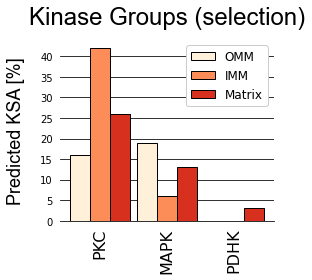

In [27]:
path_save = os.path.abspath('')+'\\raw_figures\\Figure_6\\'

selection = ['PKC', 'MAPK', 'PDHK']

Matrix_selection_val = [cc[selection[i]]['Matrix'] for i in range(len(selection))]
MIM_selection_val = [cc[selection[i]]['MIM'] for i in range(len(selection))]
MOM_selection_val = [cc[selection[i]]['MOM'] for i in range(len(selection))]

fig, ax = plt.subplots(figsize=(4, 4))
x = np.arange(len(selection))
bar_width = 0.3

b1 = ax.bar(x, MOM_selection_val,width=bar_width, label='OMM', color = '#fef0d9', ec = 'black')
b2 = ax.bar(x+bar_width, MIM_selection_val,width=bar_width, label='IMM', color = '#fc8d59', ec = 'black')
b3 = ax.bar(x+2*bar_width, Matrix_selection_val,width=bar_width, label='Matrix', color = '#d7301f', ec = 'black')

ax.set_xticks(x + bar_width)
ax.set_xticklabels(selection, size = 16,rotation='vertical')

ax.legend(fontsize = 'large', facecolor='white', framealpha = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='black')

ax.set_xlabel('', labelpad=15,size = 18,family='Arial')
ax.set_ylabel('Predicted KSA [%]', labelpad=15,size = 18,family='Arial')
ax.set_title('Kinase Groups (selection)', pad=15,size = 24,family='Arial')
ax.set_facecolor("white")
fig.tight_layout()
##plt.savefig(path_save+'Kinase_all_'+Plot_level+'_selection.pdf', bbox_inches = "tight")
plt.savefig(path_save+'Kinase_all_'+Plot_level+'_selection.pdf', bbox_inches = "tight")

In [26]:
cc

{'CAMK1': {'Matrix': 0, 'MOM': 0, 'MIM': 0},
 'PKA': {'Matrix': 3, 'MOM': 1, 'MIM': 2},
 'PDHK': {'Matrix': 3, 'MOM': 0, 'MIM': 0},
 'CK1': {'Matrix': 12, 'MOM': 18, 'MIM': 13},
 'RCK': {'Matrix': 2, 'MOM': 0, 'MIM': 0},
 'DYRK': {'Matrix': 0, 'MOM': 1, 'MIM': 0},
 'NEK': {'Matrix': 0, 'MOM': 2, 'MIM': 0},
 'CDK': {'Matrix': 0, 'MOM': 1, 'MIM': 0},
 'DAPK': {'Matrix': 6, 'MOM': 5, 'MIM': 2},
 'CAMK2': {'Matrix': 16, 'MOM': 16, 'MIM': 9},
 'GSK': {'Matrix': 2, 'MOM': 1, 'MIM': 3},
 'IKK': {'Matrix': 0, 'MOM': 2, 'MIM': 0},
 'STE20': {'Matrix': 5, 'MOM': 6, 'MIM': 9},
 'GRK': {'Matrix': 1, 'MOM': 0, 'MIM': 2},
 'MAPK': {'Matrix': 13, 'MOM': 19, 'MIM': 6},
 'CAMKL': {'Matrix': 3, 'MOM': 0, 'MIM': 1},
 'CK2': {'Matrix': 4, 'MOM': 2, 'MIM': 0},
 'AKT': {'Matrix': 0, 'MOM': 2, 'MIM': 1},
 'PKC': {'Matrix': 26, 'MOM': 16, 'MIM': 42},
 'STKR': {'Matrix': 1, 'MOM': 0, 'MIM': 0},
 'RSK': {'Matrix': 0, 'MOM': 2, 'MIM': 0},
 'PIKK': {'Matrix': 0, 'MOM': 1, 'MIM': 1}}

In [28]:
pd.DataFrame.from_dict(cc)

,CAMK1,PKA,PDHK,CK1,RCK,DYRK,NEK,CDK,DAPK,CAMK2,...,STE20,GRK,MAPK,CAMKL,CK2,AKT,PKC,STKR,RSK,PIKK
Matrix,0,3,3,12,2,0,0,0,6,16,...,5,1,13,3,4,0,26,1,0,0
MOM,0,1,0,18,0,1,2,1,5,16,...,6,0,19,0,2,2,16,0,2,1
MIM,0,2,0,13,0,0,0,0,2,9,...,9,2,6,1,0,1,42,0,0,1
